In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/boston.csv')

# 1. Pengumpulan Data

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### A. Identifikasi variabel dalam dataset yang dapat digunakan untuk memprediksi harga rumah.

type data yang di gunakan untuk prediksi mdev karena variabel medv adalah data Numerik Kontinu (angka yang memiliki rentang dan nilai pecahan).


>Dataset ini memiliki 13 variabel independen yang dapat digunakan untuk memprediksi harga rumah (medv):

- Demografi & Ekonomi: crim (kejahatan), zn (zona lahan), ptratio (rasio guru-murid), black (proporsi etnis), dan lstat (status ekonomi rendah).

- Fisik Bangunan: rm (jumlah kamar) dan age (usia bangunan).

- Lingkungan & Geografi: chas (batas sungai), nox (polusi udara), dan dis (jarak ke pusat kerja).

- Infrastruktur & Pajak: rad (akses jalan tol) dan tax (pajak properti).

### B. jelaskan bagaimana data ini relevan yang dapat digunakan untuk prediksi harga rumah

karena setiap fitur itu merepresentasikan harga rumah

- Fitur seperti **rm** (jumlah kamar) dan **age** (usia bangunan) adalah representasi langsung dari aset itu sendiri.
> Relevansi:  kapasitas dan kenyamanan. Makin banyak kamarnya, makin mahal harganya. Begitu juga dengan kondisi rumah makin baru bangunannya, makin tinggi harganya karena biaya perawatannya masih minim.

- Representasi Kualitas Lingkungan (Eksternalitas)
> **nox** (Polusi): Merepresentasikan kualitas udara. Rumah di area dengan polusi tinggi biasanya memiliki harga lebih rendah.
> **chas** (Sungai): Properti dekat air seringkali dianggap memiliki nilai estetika atau "view" yang mewah, sehingga harganya cenderung lebih tinggi.

- Representasi Aksesibilitas dan Infrastruktur
Mobilitas adalah kunci harga properti.
> **dis** (Jarak ke pusat Lokasi yang strategis itu kunci. Kalau akses ke jalan tol gampang dan jarak ke pusat perkantoran dekat, otomatis mobilitas penghuni jadi lebih simpel sampai akhirnya harga propertinya ikut melambung tinggi.
> **ptratio** (Pendidikan):
Kualitas pendidikan, yang terlihat dari rasio murid-guru yang rendah, menjadi daya tarik utama bagi keluarga dalam memilih hunian.

### C. Tuliskan juga hasil perbandingan variabel-variabel yang tersedia dan jelaskan variabel mana yang paling relevan untuk digunakan ketika tujuan analisis adalah memahami faktor penentu harga rumah.

<Axes: >

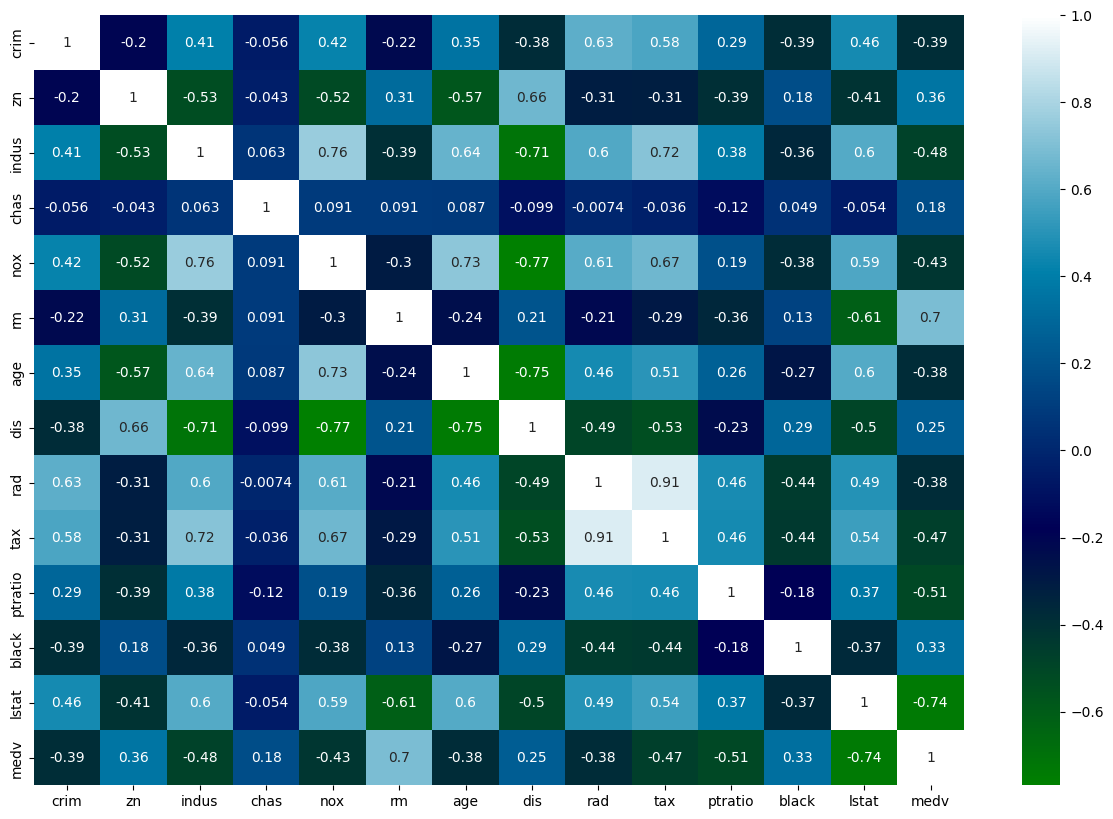

In [5]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='ocean')

fitur yang paling relevan di gunakan untuk prediksi harga rumah:
- rm: Semakin banyak jumlah kamarnya, harga rumah pasti bakal makin mahal.

- lstat: Jika lingkungannya didominasi warga berpenghasilan rendah, harga rumah di sana biasanya langsung turun.

- ptratio: Sekolah yang bagus di sekitar hunian jadi alasan kuat kenapa harga rumah di area itu terus melambung.

# 2. persiapan data

a. Bagi dataset menjadi set pelatihan, validasi, dan pengujian.
jawabnya setelah c


b. pastikan tidak ada nilai yang hilang dalam dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [9]:
# Mengecek missing values
df.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


> tidak ada missing value

c. Lakukan analisis eksplorasi awal untuk memahami distribusi data.

In [10]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


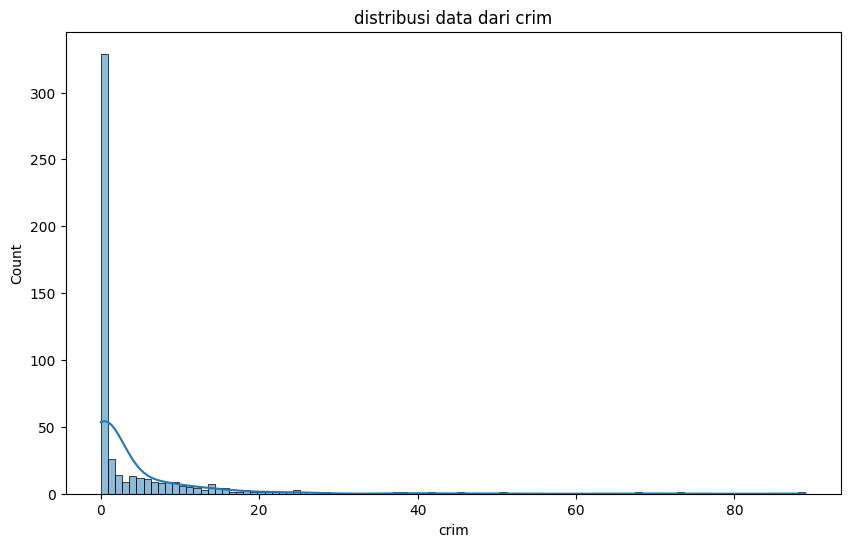

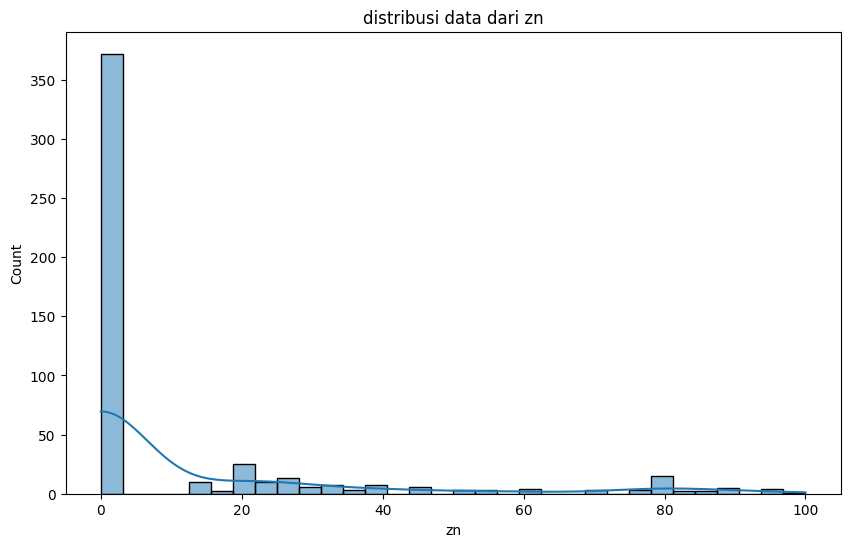

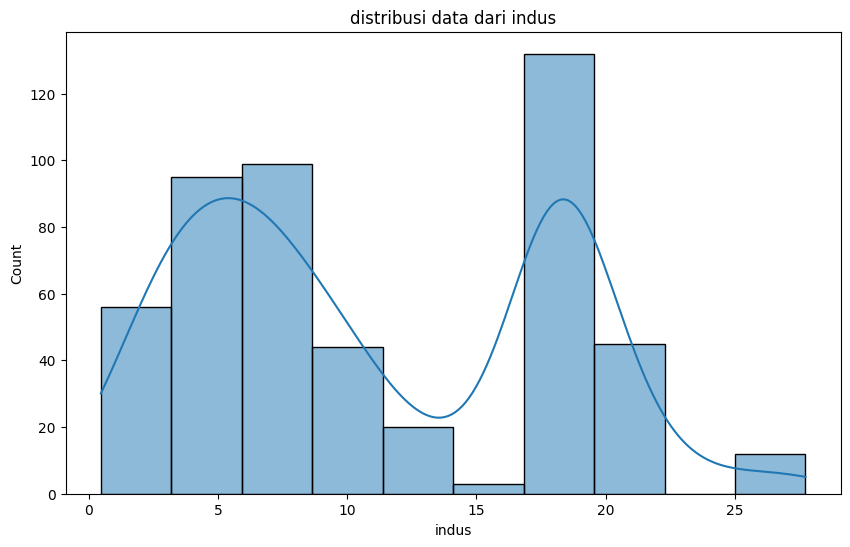

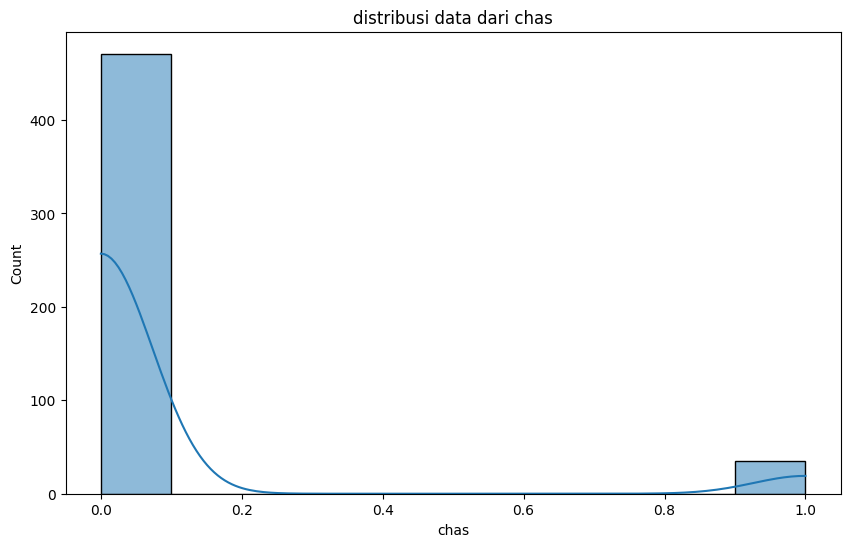

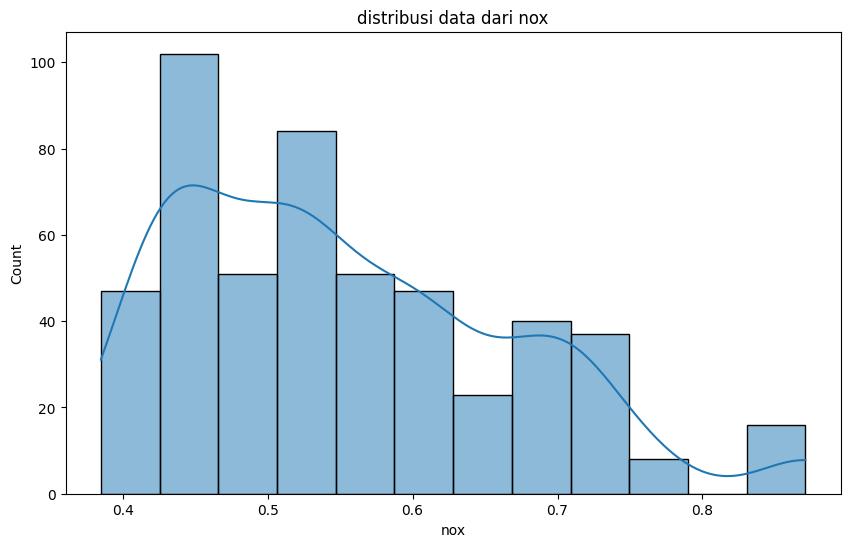

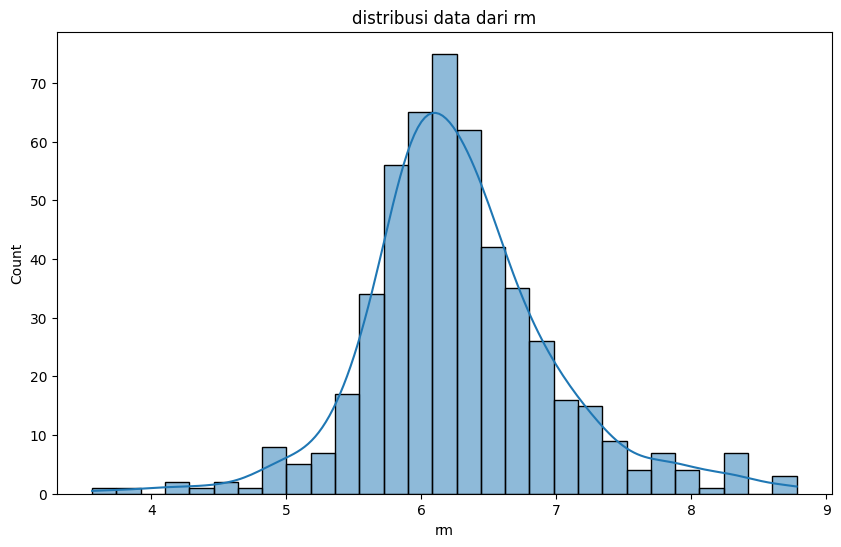

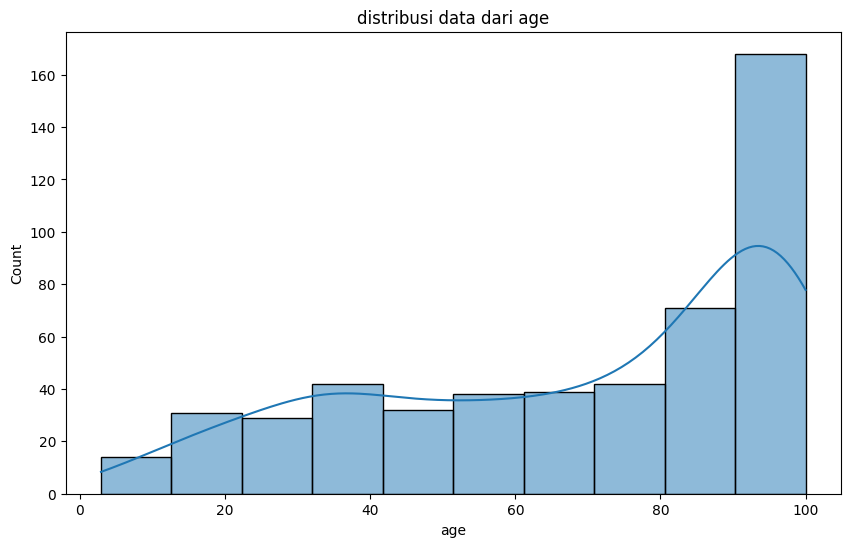

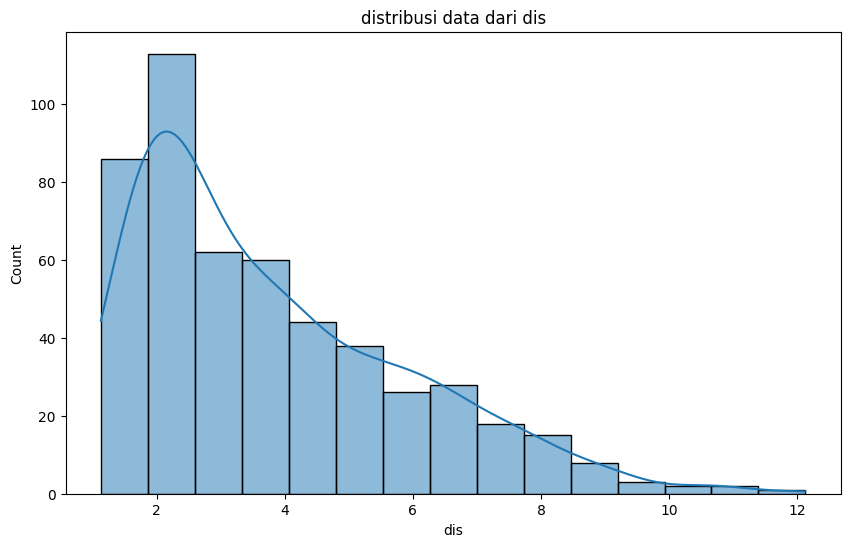

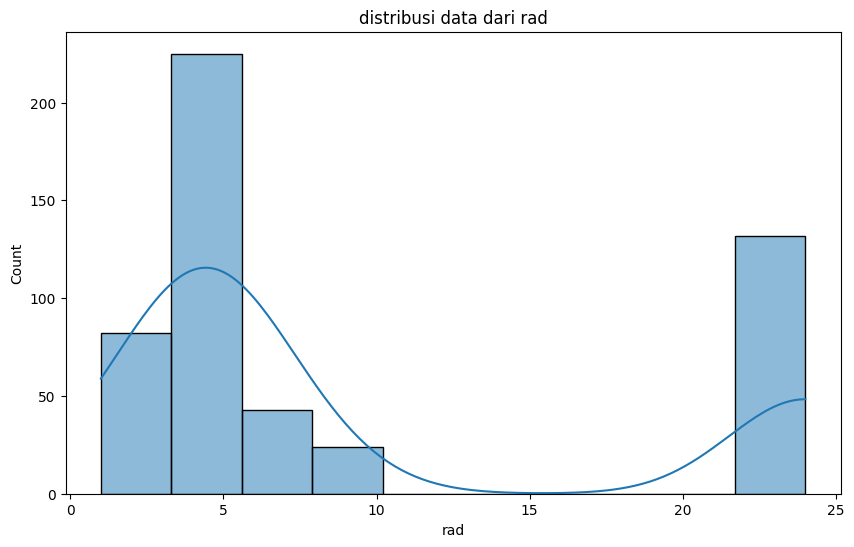

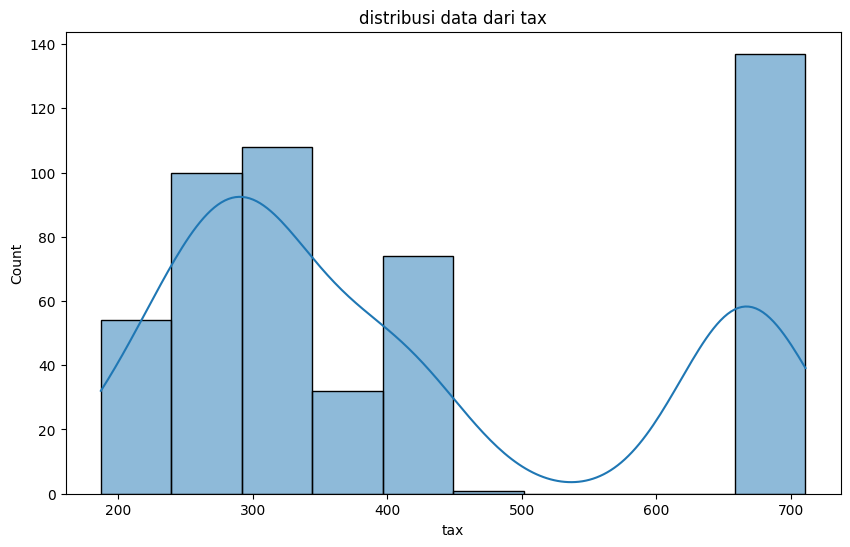

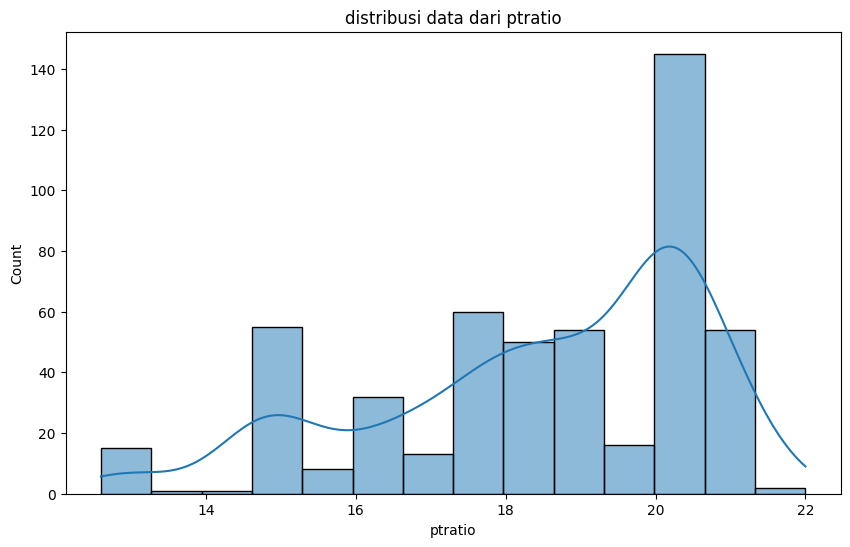

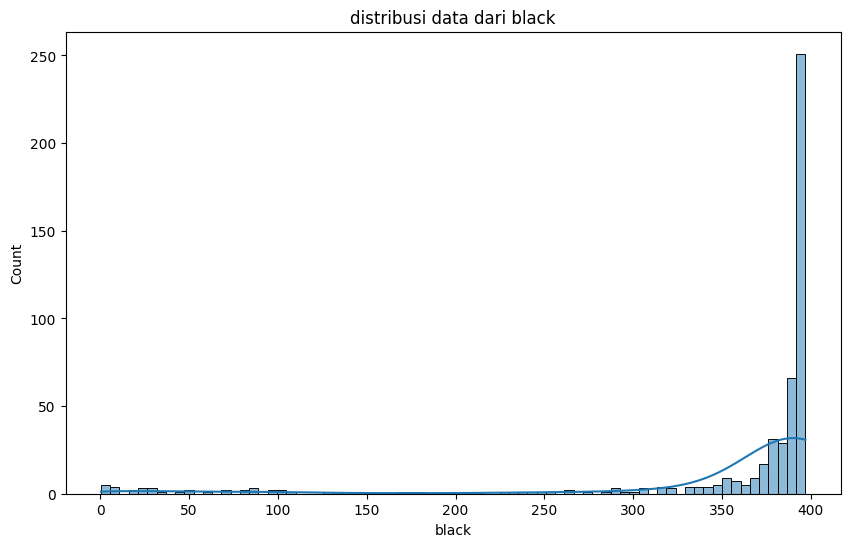

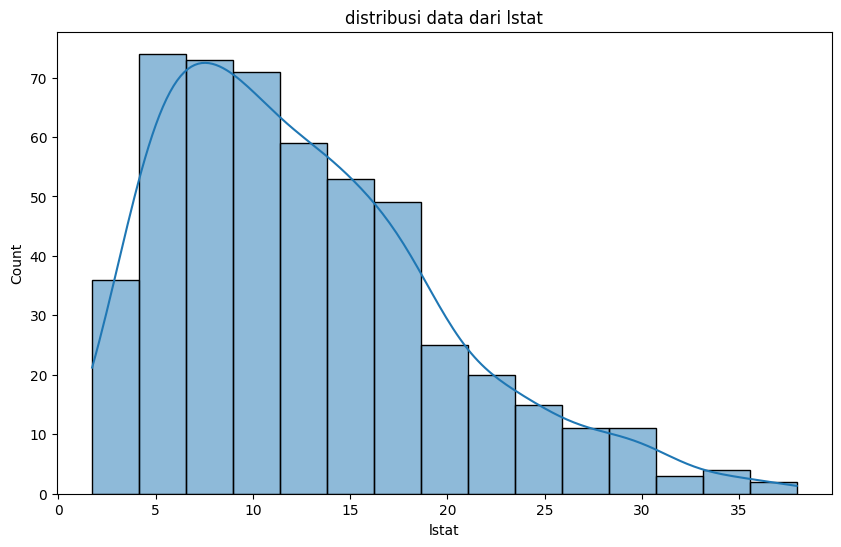

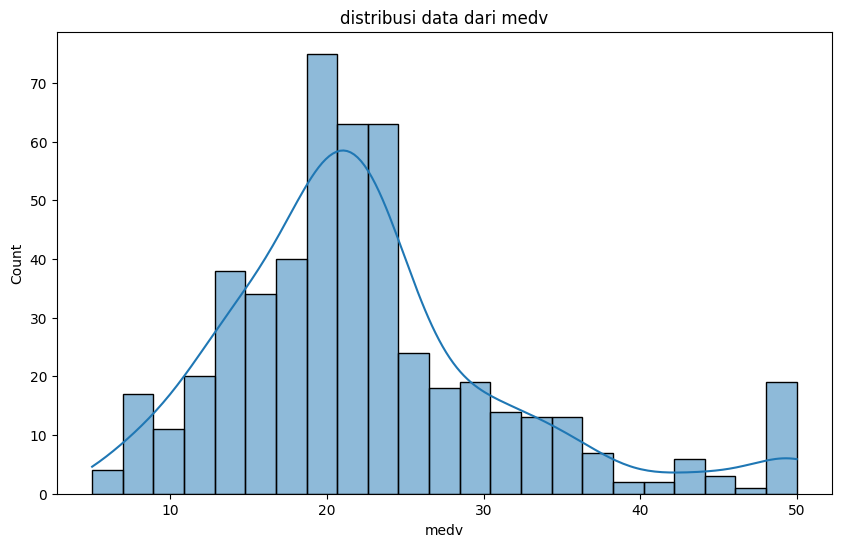

In [11]:
for c in df.columns:
  plt.figure(figsize=(10,6))
  sns.histplot(df[c], kde=True )
  plt.title(f'distribusi data dari {c}')
  plt.show()

In [12]:
# Siapkan wadah untuk hitung outlier
df_outlier = {}

for c in df.columns:
  # Cari batas normal data (atas dan bawah)
  Q1 = df[c].quantile(0.25)
  Q3 = df[c].quantile(0.75)
  IQR = Q3 - Q1

  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR

  # Hitung berapa banyak data yang keluar dari batas normal
  df_outlier[c] = ((df[c] < lower) | (df[c] > upper)).sum()

  # Simpan info batasnya
  batas = {
      'lower':lower,
      'upper':upper
  }

# Tampilkan kolom dataframe outlier
print(df_outlier)

{'crim': np.int64(66), 'zn': np.int64(68), 'indus': np.int64(0), 'chas': np.int64(35), 'nox': np.int64(0), 'rm': np.int64(30), 'age': np.int64(0), 'dis': np.int64(5), 'rad': np.int64(0), 'tax': np.int64(0), 'ptratio': np.int64(15), 'black': np.int64(77), 'lstat': np.int64(7), 'medv': np.int64(40)}


In [13]:
# Mengecilkan rentang angka yang terlalu jomplang agar data lebih seimbang
df['crim'] = np.log1p(df['crim'])
df['zn'] = np.log1p(df['zn'])

In [15]:
#ngecek lagi setelah data gak teralu jomplang
df_outlier = {}

for c in df.columns:
  Q1 = df[c].quantile(0.25)
  Q3 = df[c].quantile(0.75)

  IQR = Q3 - Q1

  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR

  df_outlier[c] = ((df[c] < lower) | (df[c] > upper)).sum()

  batas = {
      'lower':lower,
      'upper':upper
  }

print(df_outlier)

{'crim': np.int64(6), 'zn': np.int64(0), 'indus': np.int64(0), 'chas': np.int64(35), 'nox': np.int64(0), 'rm': np.int64(30), 'age': np.int64(0), 'dis': np.int64(5), 'rad': np.int64(0), 'tax': np.int64(0), 'ptratio': np.int64(15), 'black': np.int64(77), 'lstat': np.int64(7), 'medv': np.int64(40)}


a. Bagi dataset menjadi set pelatihan, validasi, dan pengujian.

In [17]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dengan cara membuang kolom target 'medv'
X = df.drop(['medv'], axis=1)

# Ambil kolom 'medv' sebagai target (y) yang ingin diprediksi
y = df['medv']

# Membagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [19]:
# melihat hasilnya:
print("Jumlah total data original:", len(df))
print("Jumlah data untuk latihan (X_train):", len(X_train))
print("Jumlah data untuk ujian (X_test):", len(X_test))

X_train.head().T

Jumlah total data original: 506
Jumlah data untuk latihan (X_train): 404
Jumlah data untuk ujian (X_test): 102


,477,15,332,423,19
crim,2.77405,0.486978,0.034073,2.085724,0.545691
zn,0.00000,0.000000,3.583519,0.000000,0.000000
indus,18.10000,8.140000,6.060000,18.100000,8.140000
chas,0.00000,0.000000,0.000000,0.000000,0.000000
nox,0.61400,0.538000,0.437900,0.614000,0.538000
rm,5.30400,5.834000,6.031000,6.103000,5.727000
age,97.30000,56.500000,23.300000,85.100000,69.500000
dis,2.10070,4.498600,6.640700,2.021800,3.796500
rad,24.00000,4.000000,1.000000,24.000000,4.000000
tax,666.00000,307.000000,304.000000,666.000000,307.000000


### D. Jelaskan perbandingan peran train, validation, dan test set, serta bagaimana pembagian tersebut membantu memastikan keputusan berbasis model tidak hanya relevan untuk data historis.


- train data di gunakan untuk melatih ai untuk dipelajari dengan dataset

- test di gunakan untuk memantau ketika ai di uji menggunakan dataset yang berbeda yang di hasilkan dari dataset yang di split apakah tingkat akurasi model sudah optimal

- validation data di gunakan untuk melakukan validasi apakah performa model tersebut dapat mempelajari data dengan akurasi tinggi atau rendah

# 3. Analisis Korelasi dan Seleksi Fitur

### A. Buat correlation plot untuk memahami hubungan antar variabel.


<Axes: >

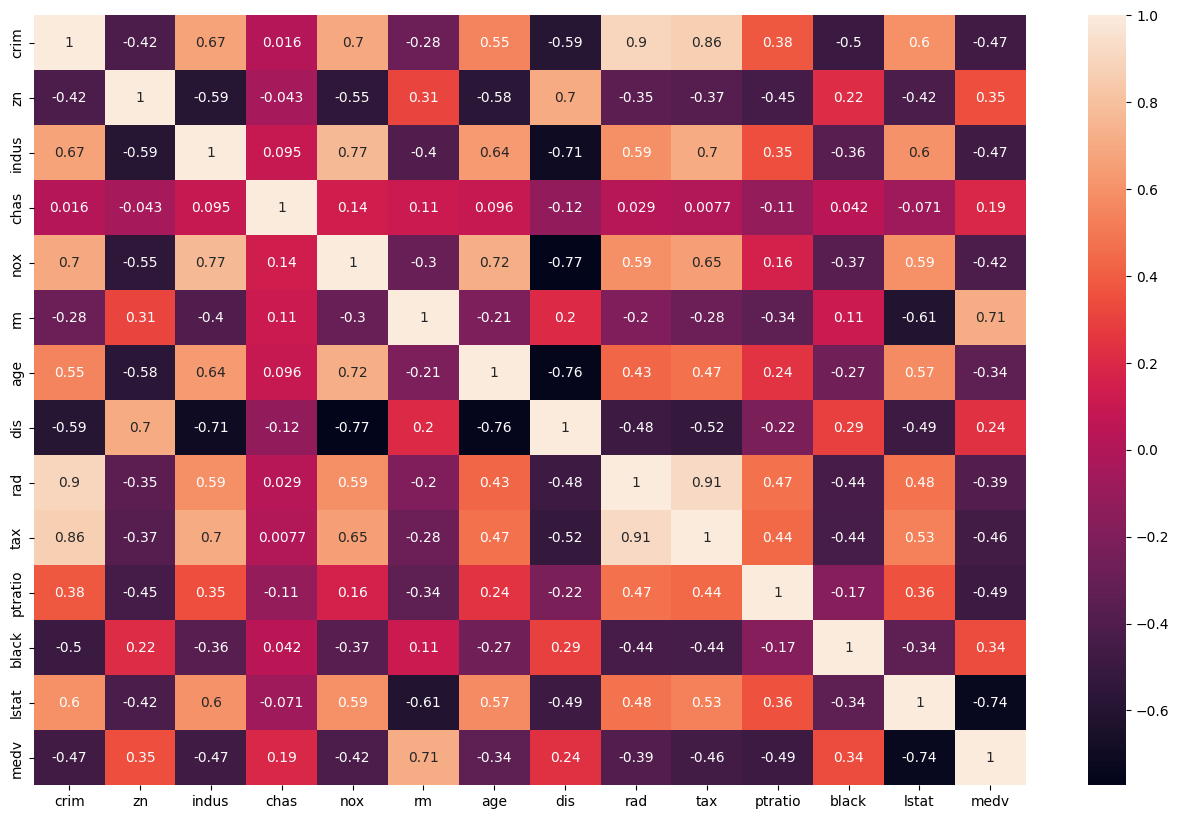

In [21]:
corelasi = pd.concat([X_train, y_train], axis=1)

plt.figure(figsize=(16,10))
sns.heatmap(corelasi.corr(), annot=True)

**insight:**

-kuat:
> 1. rm vs medv (0.71): Korelasi positif kuat. Artinya, semakin banyak jumlah kamar (rm), harga rumah (medv) hampir pasti semakin mahal.

> 2. lstat vs medv (-0.74): Korelasi negatif kuat. Artinya, semakin tinggi persentase penduduk kelas bawah (lstat) di suatu area, harga rumah di sana cenderung turun drastis.

> 3. tax vs rad (0.91): Ini korelasi antar fitur. Menunjukkan bahwa daerah dengan akses jalan tol yang mudah biasanya punya pajak properti yang sangat tinggi.

- sedang:

> 1. ptratio vs medv (-0.49): Semakin tinggi  dimana sekolah makin padat, maka harga rumah agak sedikit lebih murah.

> 2. indus vs medv (-0.48) & nox vs medv (-0.42): Area industri dan polusi udara yang tinggi cenderung menurunkan harga rumah, meski pengaruhnya tidak sebesar jumlah kamar.

> 3. crim vs medv (-0.47): Tingkat kriminalitas yang tinggi tentu menurunkan harga rumah, tapi skalanya menengah.


- lemah:

> 1. chas vs medv (0.19): Apakah rumah itu dekat sungai atau tidak, ternyata pengaruhnya sangat kecil terhadap harga jual.

> 2. dis vs medv (0.24): Jarak ke pusat kerja (dis) punya pengaruh yang lemah, dimana orang tidak terlalu mempermasalahkan jarak selama fasilitasnya oke.

### B. Identifikasi fitur yang memiliki korelasi tinggi untuk menghindari multicollinearity.

In [23]:
# mengecek multikolinearitas (hubungan antar fitur yang terlalu kuat)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# menambahkan konstanta (intercept) agar perhitungan statistik lebih akurat
from statsmodels.tools.tools import add_constant

In [24]:
# Tambahkan kolom konstanta agar nilai VIF bisa dihitung dengan benar
df_vif = add_constant(X_train)

In [25]:
df_vif

,const,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
477,1.0,2.774050,0.000000,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91
15,1.0,0.486978,0.000000,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47
332,1.0,0.034073,3.583519,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83
423,1.0,2.085724,0.000000,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,2.52,23.29
19,1.0,0.545691,0.000000,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1.0,0.158029,0.000000,8.56,0,0.5200,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
270,1.0,0.261718,3.044522,6.96,0,0.4640,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
348,1.0,0.014898,4.394449,2.01,0,0.4350,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
435,1.0,2.498185,0.000000,18.10,0,0.7400,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


In [26]:
# Membuat fungsi untuk menghitung skor VIF
def hitung_vif(df):
  vif = pd.DataFrame()
  vif['Fitur'] = df.columns

  # Hitung skor VIF untuk setiap kolom satu per satu
  vif['score'] = [variance_inflation_factor(df.values, i)
  for i in range(len(df.columns))]

  return vif

hasil = hitung_vif(df_vif)
print(hasil)

      Fitur       score
0     const  584.431043
1      crim    7.953552
2        zn    2.680443
3     indus    3.887355
4      chas    1.095911
5       nox    4.506856
6        rm    1.956621
7       age    2.990283
8       dis    4.250516
9       rad   10.985067
10      tax    8.379257
11  ptratio    2.010535
12    black    1.362580
13    lstat    2.882664


### C. Lakukan seleksi fitur berdasarkan analisis yang telah dilakukan.


In [27]:
# Buang kolom 'rad' dari data latih karena VIF tinggi
X_train = X_train.drop(['rad'], axis=1)

# Samakan data uji
X_test = X_test.drop(['rad'], axis=1)

In [28]:
df_vif_baru = add_constant(X_train)

In [29]:
# Membuat fungsi untuk menghitung skor VIF tiap kolom
def hitung_vif(df):
  vif = pd.DataFrame()
  vif['Fitur'] = df.columns

  # Hitung seberapa kuat keterkaitan antar fitur
  vif['score'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

  return vif

hasil = hitung_vif(df_vif_baru)
print(hasil)

      Fitur       score
0     const  539.016973
1      crim    5.076709
2        zn    2.679679
3     indus    3.713855
4      chas    1.083071
5       nox    4.504881
6        rm    1.904290
7       age    2.967140
8       dis    4.249282
9       tax    5.057475
10  ptratio    1.846700
11    black    1.361089
12    lstat    2.878549


### D. Tuliskan hasil analisis perbandingan antara penggunaan seluruh fitur dan fitur hasil seleksi, lalu jelaskan pendekatan mana yang lebih mendukung pengambilan keputusan yang jelas dan konsisten.

> Analisis menunjukkan bahwa awalnya fitur rad memiliki skor VIF di atas 10, yang mengindikasikan adanya multikolinearitas kuat dengan fitur lain. Setelah fitur rad dihapus (drop), seluruh skor VIF lainnya menurun, sehingga data menjadi lebih stabil dan tidak ada lagi fitur yang saling mendominasi.


# 4. Pelatihan Model

In [39]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [43]:
# latih model Ridge
rd = Ridge(alpha=2)
rd.fit(X_train, y_train)

Ridge(alpha=2)

In [46]:
# latih model Lasso
ls = Lasso(alpha= 2)
ls.fit(X_train, y_train)

Lasso(alpha=2)

In [48]:
# Import fungsi untuk menghitung rata-rata error prediksi
from sklearn.metrics import mean_squared_error

# memprediksi harga dengan model Ridge dan Lasso pada data uji
y_rid_pred = rd.predict(X_test)
y_ls_pred = ls.predict(X_test)

# Hitung skor RMSE (akar rata-rata error)
# semakin kecil nilainya, semakin akurat modelnya
rsme_rd = np.sqrt(mean_squared_error(y_test, y_rid_pred))
rsme_ls = np.sqrt(mean_squared_error(y_test, y_ls_pred))

print(f'nilai RSME dari model ridge: {rsme_rd}')
print(f'nilai RSME dari model lasso: {rsme_ls}')

nilai RSME dari model ridge: 5.152720789950775
nilai RSME dari model lasso: 5.5254270690690905


**insight:**
- Ridge lebih akurat: Model Ridge punya skor error (5.15) yang lebih rendah dibandingkan Lasso (5.52). Dalam dunia RMSE, semakin kecil angkanya, semakin jago modelnya dalam menebak harga dengan tepat.
- Akurasi Tebakan: rata-rata selisih antara harga asli dengan harga yang ditebak oleh model Ridge lebih tipis atau lebih mendekati kenyataan daripada Lasso.
> Kesimpulan: Untuk dataset ini, teknik **Ridge** Regression dengan $alpha=2$ terbukti lebih cocok dan lebih stabil dalam menangani data dibandingkan Lasso.

> Model **Ridge** lebih unggul untuk prediksi harga rumah yang presisi karena skor error-nya (RMSE 5.15) lebih kecil dan tetap mempertahankan semua informasi fitur. Sebaliknya, **Lasso** (RMSE 5.53) lebih cocok jika kamu ingin model yang lebih sederhana, karena kemampuannya otomatis membuang fitur yang dianggap tidak penting untuk menonjolkan faktor penentu harga yang paling dominan.

# 5. Interpretasi Model

### A. Analisis koefisien dari model terbaik untuk memahami pengaruh fitur terhadap harga rumah.

In [50]:
#coef = weight
#buat tabel perbandingan koefisien

coef_df = ({
    'Ridge':rd.coef_,
    'lasso':ls.coef_
})

#ubah data koefisien menjadi DataFrame
df_coef = pd.DataFrame(coef_df)
df_coef

,Ridge,lasso
0,0.091189,0.000000
1,0.324833,0.000000
2,-0.034586,-0.000000
3,2.805295,0.000000
4,-5.950858,-0.000000
5,4.678551,0.000000
6,-0.017850,0.038047
7,-1.232165,-0.000000
8,-0.002933,-0.003313
9,-0.724264,-0.600228


### B. Bandingkan hasil model Ridge dan Lasso untuk melihat perbedaan dalam pemilihan fitur.

- lasso =  seleksi fitur secara otomatis dengan menyusutkan koefisien yang tidak penting hingga menjadi nol, sehingga hasilnya model yang lebih sederhana

- Rigde = Mempertahankan seluruh fitur yang ada dengan mengecilkan bobotnya (lebih lengkap, stabil)

### C. Jelaskan fitur mana yang paling relevan untuk menjelaskan perubahan harga rumah, serta mengapa informasi tersebut penting jika digunakan sebagai pertimbangan dalam penentuan harga.

In [51]:
X = df.drop(['medv','rad'],axis=1)

coef_df = ({
    'feature':X.columns,
    'Ridge':rd.coef_,
    'lasso':ls.coef_
})

df_coef = pd.DataFrame(coef_df)
df_coef

,feature,Ridge,lasso
0,crim,0.091189,0.000000
1,zn,0.324833,0.000000
2,indus,-0.034586,-0.000000
3,chas,2.805295,0.000000
4,nox,-5.950858,-0.000000
5,rm,4.678551,0.000000
6,age,-0.017850,0.038047
7,dis,-1.232165,-0.000000
8,tax,-0.002933,-0.003313
9,ptratio,-0.724264,-0.600228


- RM (Average Number of Rooms): Memiliki koefisien positif tertinggi (4.67). Artinya, setiap penambahan satu kamar akan meningkatkan harga rumah secara signifikan. Ini adalah indikator kemewahan dan kapasitas rumah.

- CHAS (Charles River): Memiliki koefisien positif (2.80). Rumah yang berada di pinggir sungai cenderung memiliki nilai lebih tinggi karena faktor pemandangan atau eksklusivitas lokasi.

- NOX (Nitric Oxides Concentration): Memiliki koefisien negatif paling besar (-5.95). Hal ini menunjukkan bahwa tingkat polusi udara yang tinggi di sekitar rumah akan menurunkan harga jual secara drastis.

- LSTAT (Lower Status Population): Memiliki koefisien negatif pada kedua model (-0.53 dan -0.86). Semakin tinggi persentase populasi kelas ekonomi rendah di lingkungan tersebut, harga rumah cenderung menurun.

- PTRATIO (Rasio Murid-Guru): Koefisien negatif (-0.60) menunjukkan bahwa semakin padat jumlah siswa per guru, semakin turun harga rumah di area tersebut.

# 6. Evaluasi Model

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

y_rid_pred_1 = rd.predict(X_test)
y_ls_pred_1 = ls.predict(X_test)

rsme_rd = np.sqrt(mean_squared_error(y_test, y_rid_pred_1))
rsme_ls = np.sqrt(mean_squared_error(y_test, y_ls_pred_1))
MAE_rd = mean_absolute_error(y_test, y_rid_pred_1)
MAE_ls = mean_absolute_error(y_test, y_ls_pred_1)
mape_rd = mean_absolute_percentage_error(y_test, y_rid_pred_1) * 100
mape_ls = mean_absolute_percentage_error(y_test, y_ls_pred_1) * 100

print(f'rsme rd : {rsme_rd}')
print(f'rsme ls : {rsme_ls}')
print(f'\nMAE rd:{MAE_rd}')
print(f'MAE ls:{MAE_ls}')
print(f'\nmape rd : {mape_rd}%')
print(f'mape ls : {mape_ls}%')

rsme rd : 5.152720789950775
rsme ls : 5.5254270690690905

MAE rd:3.2684332586162386
MAE ls:3.792611221700154

mape rd : 17.441162875703643%
mape ls : 19.00011582429736%


1. RMSE (Root Mean Squared Error)

> Ridge: 5.15

> Lasso: 5.53
- Interpretasi: **Ridge** sedikit lebih oke. Karena angka RMSE-nya lebih kecil, model Ridge lebih pintar dalam menekan kesalahan-kesalahan besar. Jadi, tebakan harganya jarang ada yang meleset terlalu jauh dari harga aslinya.

2. MAE (Mean Absolute Error)

> Ridge: 3.27

> Lasso: 3.79

- Interpretasi: **Ridge** lebih akurat secara rata-rata. Kalau di lihat selisih harga secara umum,  Ridge punya "jarak" error yang lebih tipis. Bisa dibilang, tebakan Ridge lebih konsisten mendekati kenyataan.

3. MAPE (Mean Absolute Percentage Error)

> Ridge: 17.44%

> Lasso: 19.00%

- Interpretasi:
**Ridge** menang lagi dari sisi persentase. Dalam dunia properti, error di bawah 20% itu sudah cukup bagus. Ridge berhasil menjaga tingkat kesalahan di angka 17%, yang berarti prediksinya lebih presisi dibanding Lasso yang nyaris menyentuh 20%.

Kesimpulannya: Kalau tujuannya cari model yang paling akurat dan stabil untuk tebak harga rumah adlah **Ridge**

### C. Jelaskan metrik mana yang paling sesuai untuk digunakan, serta bagaimana pemilihan metrik tersebut memengaruhi cara model digunakan dalam pengambilan keputusan harga rumah.

1. Gunakan RMSE jika Fokus pada "Keamanan" (Risiko) **RMSE** adalah metrik terbaik jika kamu ingin menghindari kesalahan fatal. Karena RMSE sangat sensitif terhadap outlier, nilai ini akan membengkak jika ada satu saja prediksi yang meleset jauh (misalnya rumah mewah dihargai sangat murah).
2. Gunakan MAPE jika Fokus pada "Strategi Pasar" (Komersial) **MAPE** lebih pas untuk komunikasi bisnis karena menggunakan persentase.

# Reflection
1. Mengapa penting memahami konsep regularisasi seperti Ridge dan Lasso dalam membangun model regresi? Bagaimana teknik ini membantu meningkatkan performa model dalam kasus prediksi dunia nyata seperti harga rumah?
2. Bagaimana proses analisis korelasi, seleksi fitur, dan pemilihan model berdasarkan validation set membantu kamu membangun model yang lebih akurat dan dapat dipercaya? Apa hal yang paling kamu pelajari dari tahapan tersebut?

jawaban:
1. Tujuan utama regularisasi adalah mencegah overfitting, yaitu kondisi ketika model terlalu “nempel” pada data latih sehingga performa prediksinya buruk saat menghadapi data baru. **Ridge** kerjanya kayak ngecilin volume semua fitur biar nggak ada yang terlalu dominan sehingga sangat cocok untuk menangani fitur yang saling berkorelasi, sementara **Lasso** melangkah lebih jauh dengan menyusutkan sekaligus menghapus fitur yang kurang penting untuk menyederhanakan model. konsep ini menyeimbangkan bias-variance trade-off, sehingga model yang dihasilkan tetap akurat, ramping, dan stabil saat digunakan untuk memprediksi harga di dunia nyata.





2.  Pertama, analisis korelasi itu penting banget supaya kita tahu fitur mana saja yang saling berkaitan. Contohnya, luas rumah biasanya sejalan dengan jumlah kamar; kalau satu naik, satunya pasti naik juga. Dengan paham hubungan ini, kita bisa menghindari masalah multikolinearitas, yaitu kondisi di mana fitur-fitur yang terlalu mirip malah bikin hitungan model jadi berantakan dan nggak stabil.

> Kedua, ada tahap seleksi fitur buat milih variabel mana yang beneran penting buat nebak harga. Di sini Lasso ngebantu banget karena dia otomatis "memecat" fitur yang nggak guna, tapi kita juga bisa milih manual pakai logika atau bantuan statistik. Hasilnya, model kita jadi lebih simpel, kerjanya lebih cepet, dan kita jadi lebih gampang jelasin ke orang lain kenapa harga rumah bisa naik atau turun.

> Terakhir, kita pakai validation set buat ngetes model sebelum beneran dipakai. Ibarat ujian simulasi, validation set ngasih gambaran seberapa jago model kita (Ridge, Lasso, atau OLS) pas ketemu data yang belum pernah dia lihat sebelumnya. Dari sini, kita bisa mutusin mana model yang paling akurat dan stabil di dunia nyata, bukan cuma sekadar jago "menghafal" data latihan aja.